In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
%matplotlib inline

In [14]:
# load a file 
file_path = "/Users/sanchit/Documents/Projects/datasets/audio_data/samples/audio03.wav"

audio_data, sampling_rate = librosa.load(file_path)

print(f"shape of the audio file: {audio_data.shape} and sampling rate: {sampling_rate}")

shape of the audio file: (397763,) and sampling rate: 22050


In [15]:
print(f"data type: {type(audio_data[0])}")
#print(audio_data)

data type: <class 'numpy.float32'>


In [16]:
# play the audio file
ipd.Audio(audio_data, rate=sampling_rate)

### Compute STFT

In [17]:
# parameters for computing short-time FT 
n_fft = 2048 
hop_length = int(n_fft / 4)
win_length = n_fft 

stft_data = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

print(f"shape of the STFT: {stft_data.shape}")

shape of the STFT: (1025, 777)


### Compute the Spectrogram (magnitude)
Squared of the absolute value of the STFT or FT

In [18]:
spectrogram = librosa.amplitude_to_db(abs(stft_data)) # (abs(X))**2 

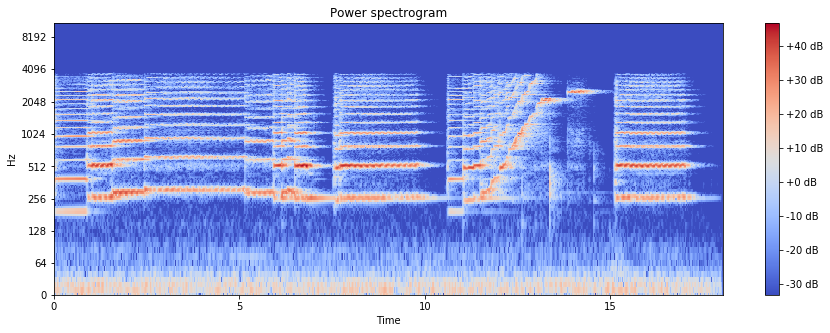

In [19]:
# plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(spectrogram, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='log') 
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [9]:
# play the audio file
ipd.Audio(audio_data, rate=sampling_rate)

### Compute Mel Spectrogram

In [10]:
#mel_spectrogram = librosa.feature.melspectrogram(S=spectrogram, sr=sampling_rate)

mel_spectrogram = librosa.feature.melspectrogram(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length)

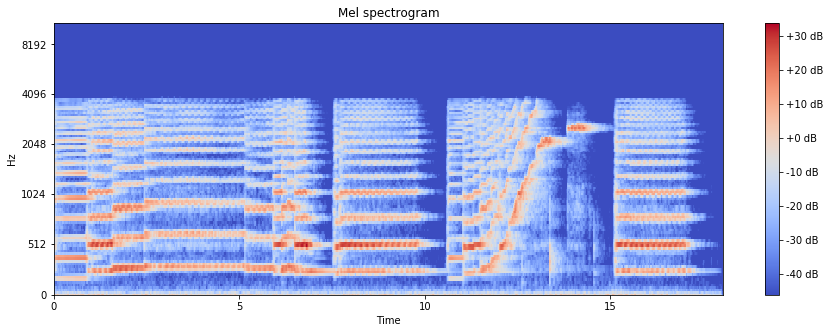

In [11]:
log_mel_spect = librosa.power_to_db(abs(mel_spectrogram))

# plot the mel-spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(log_mel_spect, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='mel') 
plt.title('Mel spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()